In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import scikitplot as splt

In [2]:
df=pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df=df.dropna()   #removing nan values 

In [7]:
df=df.reset_index()

In [8]:
df.shape  #shape of the dataframe after removal of null values

(18285, 6)

In [9]:
X=df.drop("label",axis=1)
X.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
y=df["label"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Text Preprocessing

Text preprocessing will consist of following steps 

remove html tags if present

covert text into lower case
remove punctuation

remove word having length less than and equal to 2

remove stopwords

stemming/lemmatizing 


In [ ]:
#checking is there any html tags present in sentence 
for sent in X.text.values:
  if (len(re.findall(r"<.*?>",sent))):
    print(sent)

As there is no any html symbol present in the dataset hence we skip the html tags removal process in text preprocessing


In [12]:
nltk.download("stopwords")
nltk.download("wordnet")
stop_words=set(stopwords.words("english"))
ps=PorterStemmer()
filtered_sentence=[]  #final filtered sentenced will vbe stored here
for i in range(0,len(df["text"])):
    cleaned=re.sub(r"[^a-zA-Z]"," ",df["text"][i])
    cleaned=re.sub(r"<.*?>"," ",cleaned)
    cleaned=cleaned.lower() 
    cleaned=cleaned.split()
    cleaned=[ps.stem(word)  for word in cleaned if word not in stop_words if len(word)>2]
    cleaned=" ".join(cleaned)
    filtered_sentence.append(cleaned)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
filtered_sentence[18284]

'david swanson author activist journalist radio host nobel peac prize nomine director worldbeyondwar com campaign coordin rootsact org host talk nation radio talk nation radio radio syndic pacifica network show also air wtju charlottesvil wcsx detroit kghi westport whu storr wprr grand rapid krfp moscow kzgm cabool kmud garbervil wazu peoria wxrd crown point geneva radio geneva kkrn round mountain kskq ashland wuow oneonta lie radio pinol wyap clay detour johnson citi wzrd chicago weft champaign wxpi pittsburgh wdrt viroqua verac onlin liberti justic radio shirley ithaca commun radio ithaca wmcb greenfield prx org kao olympia wusb stoni brook wool bellow fall vermont wslr sarasota florida also blog davidswanson org warisacrim org prolif author latest book war lie daybreak undo imperi presid form perfect union world outlaw war swanson hold master degre philosophi univers virginia work newspap report commun director job includ press secretari denni kucinich presidenti campaign media coor

In [14]:
count_vec=CountVectorizer(max_features=5000,ngram_range=(1,3),binary=True)
X=count_vec.fit_transform(X["text"]).toarray()
X.shape

(18285, 5000)

In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [16]:
count_vec.get_feature_names()[50:70]

['33',
 '35',
 '36',
 '38',
 '40',
 '400',
 '45',
 '50',
 '500',
 '60',
 '70',
 '75',
 '80',
 '90',
 'abc',
 'ability',
 'ability to',
 'able',
 'able to',
 'about']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
message=pd.DataFrame(X_train,columns=count_vec.get_feature_names())
message.head()

,000,000 people,10,100,11,12,13,14,15,16,17,18,19,1980s,1990s,20,20 years,200,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2016 by,2016 the,2017,21,22,23,...,years to,yes,yesterday,yet,yet to,york,york city,york times,you,you and,you are,you can,you can follow,you could,you do,you don,you get,you have,you have to,you know,you like,you ll,you may,you need,you re,you see,you should,you think,you to,you ve,you want,you want to,you will,young,younger,your,yourself,youtube,zero,zone
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modeling

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_predict=mnb.predict(X_test)

In [20]:
y_predict

array([1, 1, 0, ..., 1, 0, 1])

In [21]:
accuracy_score(y_test,y_predict)

0.8840579710144928

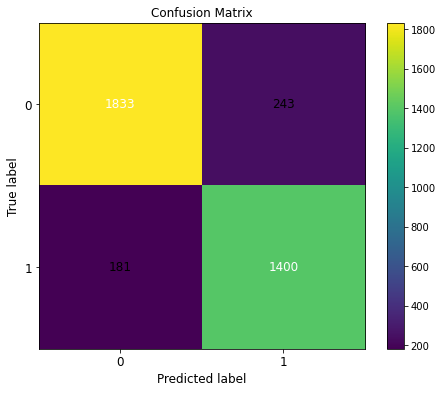

In [22]:
splt.metrics.plot_confusion_matrix(y_test,y_predict,figsize=(8,6),text_fontsize="large",cmap="viridis",title_fontsize="large")
plt.show()

In [23]:
y_predict_probab=mnb.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


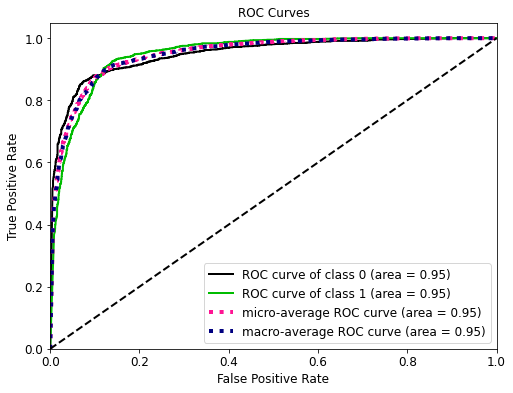

In [24]:
#plotting roc auc curve
splt.metrics.plot_roc_curve(y_test,y_predict_probab,figsize=(8,6),text_fontsize="large")
plt.show()

In [25]:
#lets' see how hyperparameter alpha increases the accuracy of nb
for alpha in (np.arange(0,1,0.1)):
  mnb=MultinomialNB()
  mnb.fit(X_train,y_train)
  y_predicted=mnb.predict(X_test)
  asore=accuracy_score(y_test,y_predicted)
  print( "at  alpha :- {}  accuracy score is :- {}".format(alpha,round(asore,7)))

at  alpha :- 0.0  accuracy score is :- 0.884058
at  alpha :- 0.1  accuracy score is :- 0.884058
at  alpha :- 0.2  accuracy score is :- 0.884058
at  alpha :- 0.30000000000000004  accuracy score is :- 0.884058
at  alpha :- 0.4  accuracy score is :- 0.884058
at  alpha :- 0.5  accuracy score is :- 0.884058
at  alpha :- 0.6000000000000001  accuracy score is :- 0.884058
at  alpha :- 0.7000000000000001  accuracy score is :- 0.884058
at  alpha :- 0.8  accuracy score is :- 0.884058
at  alpha :- 0.9  accuracy score is :- 0.884058


In [26]:
coef=mnb.coef_

In [27]:
features=count_vec.get_feature_names()


In [28]:
dict2=dict(sorted(zip(features,coef[0]),reverse=True)[:20])
dict2

{'you like': -9.543150389066971,
 'you ll': -9.276974521836154,
 'you may': -8.982521942817161,
 'you need': -8.982521942817161,
 'you re': -8.18746147702316,
 'you see': -9.168900300306731,
 'you should': -9.193592912897103,
 'you think': -8.860698497623774,
 'you to': -8.454039359523001,
 'you ve': -9.08923289757286,
 'you want': -8.592012925862647,
 'you want to': -8.986578743512776,
 'you will': -8.657099542382536,
 'young': -8.360683789962,
 'younger': -10.122462426978117,
 'your': -6.953415280031675,
 'yourself': -8.605806247994984,
 'youtube': -8.745707088904986,
 'zero': -8.79817814064244,
 'zone': -9.178704300403353}

In [29]:
most_real_words=pd.Series(dict2)
most_real_words  #20 _most_realwords

zone           -9.178704
zero           -8.798178
youtube        -8.745707
yourself       -8.605806
your           -6.953415
younger       -10.122462
young          -8.360684
you will       -8.657100
you want to    -8.986579
you want       -8.592013
you ve         -9.089233
you to         -8.454039
you think      -8.860698
you should     -9.193593
you see        -9.168900
you re         -8.187461
you need       -8.982522
you may        -8.982522
you ll         -9.276975
you like       -9.543150
dtype: float64

In [30]:
#most fake words
dict1=dict(sorted(zip(features,coef[0]))[:20])
dict1

{'000': -7.424590430791664,
 '000 people': -9.906942800774567,
 '10': -7.400168164349987,
 '100': -8.123723093094647,
 '11': -7.599268638273051,
 '12': -8.094980624228993,
 '13': -8.551739026724707,
 '14': -8.538666945157356,
 '15': -7.966880621601677,
 '16': -8.365041095330955,
 '17': -8.541267726857413,
 '18': -8.485557119843406,
 '19': -8.77817747393577,
 '1980s': -9.847519380303767,
 '1990s': -9.80977905232092,
 '20': -7.77289712505988,
 '20 years': -9.782380078132807,
 '200': -8.808330512106458,
 '2000': -9.327124305521625,
 '2001': -9.515176537024566}

In [31]:
most_fake_words=pd.Series(dict1.keys())  #20 most fake words
most_fake_words

0            000
1     000 people
2             10
3            100
4             11
5             12
6             13
7             14
8             15
9             16
10            17
11            18
12            19
13         1980s
14         1990s
15            20
16      20 years
17           200
18          2000
19          2001
dtype: object

In [32]:
count_vec.get_params()  #all the parameteres using in count vectorizer

{'analyzer': 'word',
 'binary': True,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [33]:
result=pd.DataFrame({"Actual":y_test,"predicted":y_predicted})
result.head(50)

,Actual,predicted
3284,1,1
10140,1,1
16348,0,0
14723,1,1
13154,1,1
15928,1,1
15434,0,0
13273,0,0
7648,0,0
15713,0,0


In [34]:
new_prediction=mnb.predict([np.zeros(5000)])
new_prediction  #news is not fake

array([0])

# New section

Feature Extraction and fake news classifier using TFIDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features=5000,ngram_range=(1,3),binary=True)

In [36]:
tf_vec.get_params()  #All the parameter called during tfidf calling

{'analyzer': 'word',
 'binary': True,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [37]:
X1=tf_vec.fit_transform(df["text"])

In [38]:
y1=y

In [39]:
X.shape

(18285, 5000)

In [40]:
y.shape

(18285,)

In [41]:
X_test[0]

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=1)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(14628, 5000)
(14628,)
(3657, 5000)
(3657,)


In [43]:
features=tf_vec.get_feature_names()

In [44]:
mnb1=MultinomialNB()
mnb1.fit(X1_train,y1_train)
y1_predicted=mnb1.predict(X1_test)

In [45]:
accuracy_score(y1_test,y1_predicted)  #there is slight increase in accuracy seen as compare to bag of words

0.8955427946404156

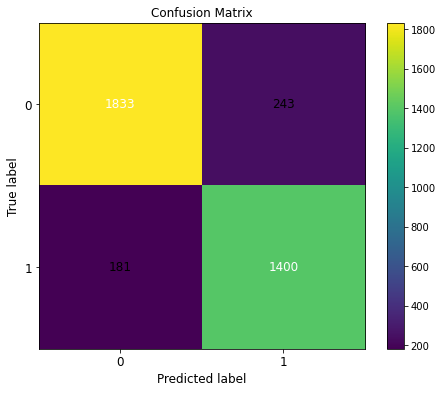

In [46]:
splt.metrics.plot_confusion_matrix(y_test,y_predict,figsize=(8,6),text_fontsize="large",cmap="viridis",title_fontsize="large")
plt.show()

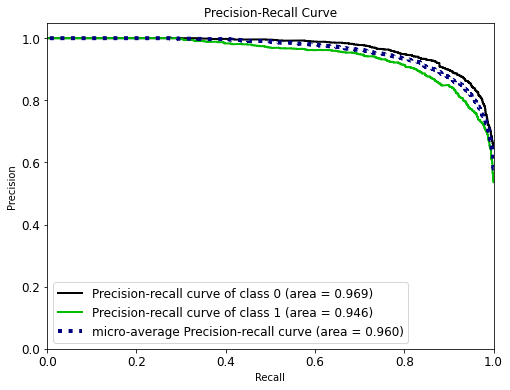

In [47]:
splt.metrics.plot_precision_recall(y1_test,mnb.predict_proba(X1_test),figsize=(8,6),text_fontsize="large")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


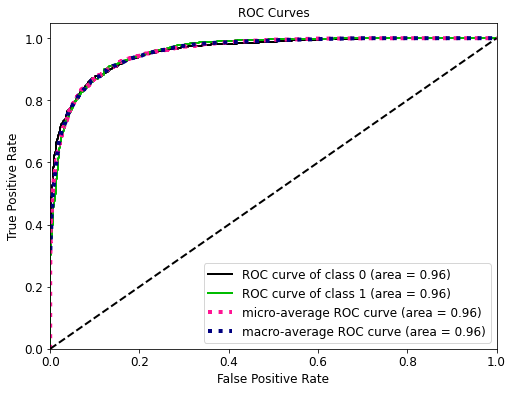

In [48]:
splt.metrics.plot_roc_curve(y1_test,mnb.predict_proba(X1_test),figsize=(8,6),text_fontsize="large")
plt.show()

In [49]:
dict1=dict(sorted(zip(features,mnb1.coef_[0]),reverse=True)[:20]) #20 most positive words
dict1

{'you like': -9.072483616090487,
 'you ll': -8.887465368965762,
 'you may': -8.650118410769156,
 'you need': -8.630819651563217,
 'you re': -8.147900586411527,
 'you see': -8.867848582766626,
 'you should': -8.80016649316263,
 'you think': -8.552826363526075,
 'you to': -8.152068300024892,
 'you ve': -8.79151090878902,
 'you want': -8.411089140596406,
 'you want to': -8.67453559775773,
 'you will': -8.456270538377002,
 'young': -8.386644722009468,
 'younger': -9.65292148021808,
 'your': -7.096009740616914,
 'yourself': -8.329458172488582,
 'youtube': -8.117282464582134,
 'zero': -8.384518157976203,
 'zone': -8.938837866381304}

In [50]:
most_positive_20=pd.Series(dict1)
most_positive_20

zone          -8.938838
zero          -8.384518
youtube       -8.117282
yourself      -8.329458
your          -7.096010
younger       -9.652921
young         -8.386645
you will      -8.456271
you want to   -8.674536
you want      -8.411089
you ve        -8.791511
you to        -8.152068
you think     -8.552826
you should    -8.800166
you see       -8.867849
you re        -8.147901
you need      -8.630820
you may       -8.650118
you ll        -8.887465
you like      -9.072484
dtype: float64

In [51]:
dict2=dict(sorted(zip(features,mnb1.coef_[0]),reverse=False)[:20]) #20 most negative words
dict2

{'000': -7.59299421448128,
 '000 people': -9.464521287341283,
 '10': -7.388423889728802,
 '100': -8.069560393481101,
 '11': -7.471378084366893,
 '12': -7.868827553061503,
 '13': -8.250934725120091,
 '14': -8.245127658638026,
 '15': -7.838155398791506,
 '16': -7.9912645300757745,
 '17': -8.214651672615366,
 '18': -8.193546469146302,
 '19': -8.352185211823423,
 '1980s': -9.651495094442382,
 '1990s': -9.520572563094815,
 '20': -7.790585794521184,
 '20 years': -9.425605265668368,
 '200': -8.435645585153225,
 '2000': -8.950722960687498,
 '2001': -9.13574082991592}

In [52]:
most_negative_20=pd.Series(dict2)
most_negative_20

000          -7.592994
000 people   -9.464521
10           -7.388424
100          -8.069560
11           -7.471378
12           -7.868828
13           -8.250935
14           -8.245128
15           -7.838155
16           -7.991265
17           -8.214652
18           -8.193546
19           -8.352185
1980s        -9.651495
1990s        -9.520573
20           -7.790586
20 years     -9.425605
200          -8.435646
2000         -8.950723
2001         -9.135741
dtype: float64

## Word2Vec Implementation

why we implement word2vec ?

B.O.W and TFIDF doesnot provide the semantic meaning to segregate words present in sentence. suppose you have tasty and delicious two word both have same meaning but they are not treated as same in case of b.o.w and tfidf.
So for that we use alternate text preprocessing method known as word2vec which seperate words based on semanticity. 

In [108]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Text Preprocessing

In [141]:
for i in range(len(df)):
  cleaned=re.sub(r"<.*?"," ",df["text"][i])
  cleaned=re.sub(r"[^a-zA-Z]"," ",cleaned)
  cleaned=re.sub(r"\d+"," ",cleaned)
  cleaned=cleaned.lower()
  sent=sent_tokenize(cleaned)
sentences=[word_tokenize(sentence) for sentence in sent]

In [142]:
sentences

[['david',
  'swanson',
  'is',
  'an',
  'author',
  'activist',
  'journalist',
  'and',
  'radio',
  'host',
  'he',
  'is',
  'a',
  'nobel',
  'peace',
  'prize',
  'nominee',
  'he',
  'is',
  'director',
  'of',
  'worldbeyondwar',
  'com',
  'and',
  'campaign',
  'coordinator',
  'for',
  'rootsaction',
  'org',
  'he',
  'hosts',
  'talk',
  'nation',
  'radio',
  'talk',
  'nation',
  'radio',
  'is',
  'on',
  'vt',
  'radio',
  'and',
  'is',
  'syndicated',
  'by',
  'pacifica',
  'network',
  'the',
  'show',
  'also',
  'airs',
  'on',
  'wtju',
  'charlottesville',
  'va',
  'wcsx',
  'detroit',
  'mi',
  'kghi',
  'westport',
  'wa',
  'whus',
  'storrs',
  'ct',
  'wprr',
  'grand',
  'rapids',
  'mi',
  'krfp',
  'lp',
  'moscow',
  'id',
  'kzgm',
  'cabool',
  'mo',
  'kmud',
  'garberville',
  'ca',
  'wazu',
  'peoria',
  'il',
  'wxrd',
  'crown',
  'point',
  'in',
  'geneva',
  'radio',
  'geneva',
  'ny',
  'kkrn',
  'round',
  'mountain',
  'ca',
  'kskq',


In [143]:
for j in range(0,len(sentences)):
  sentences[j]=[word for word in sentences[j] if word not in stop_words]

In [156]:
model=Word2Vec(sentences,min_count=1,size=100)
X2=model.wv.vocab

In [149]:
model.wv["verifiable"]

array([-2.9903483e-03,  1.0423443e-03,  1.3115185e-03, -4.3473071e-03,
        4.2557162e-03,  2.0231658e-03,  3.6990906e-03, -3.4304385e-03,
       -6.6706369e-04, -4.8321043e-03, -3.7647018e-04, -6.3442938e-05,
        5.4589944e-04, -4.3329832e-04,  1.9839276e-03, -6.0441391e-05,
        1.3280100e-03, -1.7560782e-03,  4.3867836e-03, -1.5806730e-03,
        1.0883430e-03,  4.2927191e-03, -2.7191394e-03,  3.4485431e-04,
        1.8121409e-03,  9.7685109e-04,  2.6915041e-03,  3.4177785e-03,
        2.0692912e-03, -4.6653505e-03,  2.0413708e-03,  2.7949959e-03,
        1.9504122e-03, -2.2293089e-03, -8.7384193e-04, -4.6029324e-03,
        4.5553208e-03, -1.4106985e-03, -2.1878574e-03,  1.5925729e-03,
       -1.5238553e-03, -4.8624291e-03,  3.3906186e-03, -3.7966643e-03,
        3.5218303e-03, -3.9789267e-03,  5.5607851e-04,  1.0395568e-03,
        3.6307829e-03, -3.8562762e-03, -2.1145428e-03,  3.0559190e-03,
        5.4014336e-06,  1.0097225e-03, -2.4934083e-03, -3.6644796e-03,
      

In [150]:
model.wv.most_similar("verifiable")

[('water', 0.330014169216156),
 ('ability', 0.2948264479637146),
 ('oneonta', 0.2691255211830139),
 ('western', 0.2240910828113556),
 ('cognitive', 0.21918165683746338),
 ('bases', 0.21546214818954468),
 ('crisis', 0.21541906893253326),
 ('star', 0.2105100005865097),
 ('perfectly', 0.21028295159339905),
 ('ny', 0.20358553528785706)]

In [152]:
model.wv.similarity("verifiable","cognitive")

0.21918167

In [154]:
model.wv.most_similar("cancellation")

[('base', 0.3132632374763489),
 ('poorer', 0.28203240036964417),
 ('lp', 0.249421626329422),
 ('davidswanson', 0.24670663475990295),
 ('also', 0.2428976148366928),
 ('three', 0.2206742763519287),
 ('imperial', 0.22042514383792877),
 ('kucinich', 0.21465376019477844),
 ('weapon', 0.2132783681154251),
 ('areas', 0.2123652994632721)]